In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.min_rows', 200)

In [3]:
dataset = pd.read_csv('train.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#Look at survival rate by sex, age and class
age = pd.cut(dataset['Age'], [0, 18, 80])
dataset.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

<AxesSubplot:xlabel='Survived', ylabel='Age'>

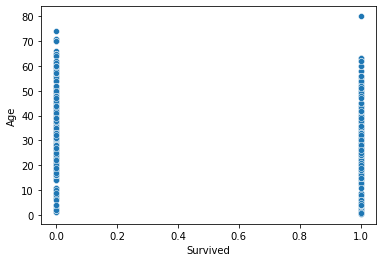

In [5]:
sns.scatterplot(y='Age', x='Survived', data = dataset)

<AxesSubplot:>

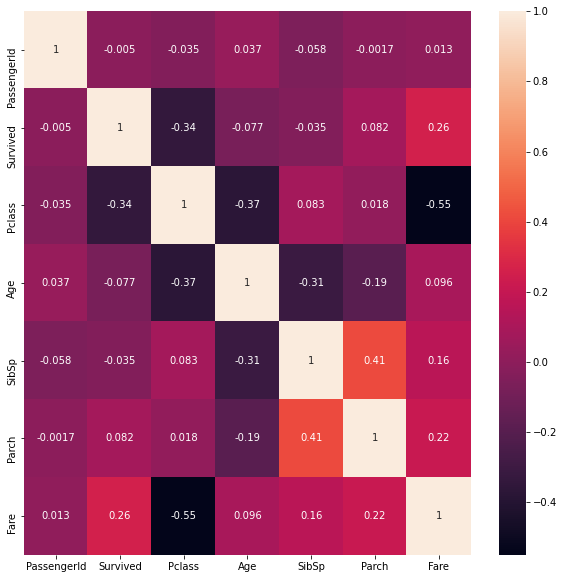

In [6]:
dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True)

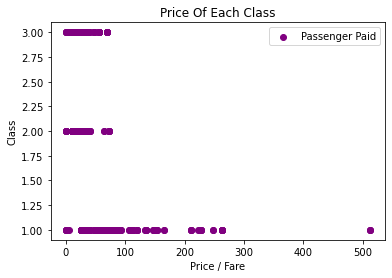

In [7]:
#Plot the Prices Paid Of Each Class
plt.scatter(dataset['Fare'], dataset['Pclass'],  color = 'purple', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price Of Each Class')
plt.legend()
plt.show()

In [8]:
dataset = dataset.drop(['PassengerId','Name'], axis = 1 )
dataset.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [9]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
columns_with_na  = [columns for columns in dataset.columns if dataset[columns].isnull().sum() > 1]
columns_with_na

## 2- step print the feature name and the percentage of missing values
for columns in columns_with_na:
    print(columns, np.round(dataset[columns].isnull().mean(), decimals=4), '% na values' )

Age 0.1987 % na values
Cabin 0.771 % na values
Embarked 0.0022 % na values


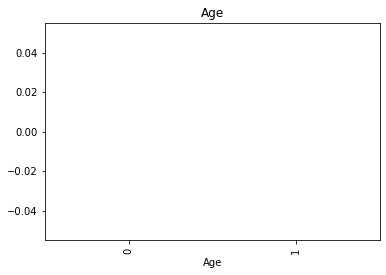

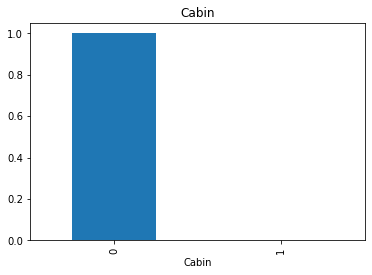

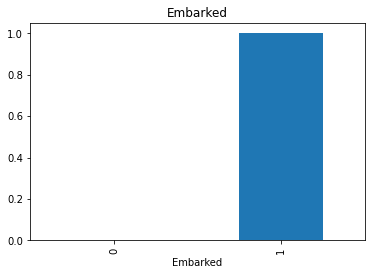

In [11]:
for columns in columns_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[columns] = np.where(dataset[columns].isnull(), 1, 0)
    
    # let's calculate the mean survival rate where the information is missing or present
    data.groupby(columns)['Survived'].median().plot.bar()
    plt.title(columns)
    plt.show()

In [12]:
# here we can observe that for age - no value is correlated to the survival columns therfore we can drop this column
# for cabin it is shown that no null value is reposible for the predictions


In [13]:
dataset = dataset.drop(['Cabin','Ticket', 'Age'], axis =1)
dataset['Embarked'] = dataset['Embarked'].fillna(value = 'other')

C:\Users\Aakash.kumar\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Sex'>

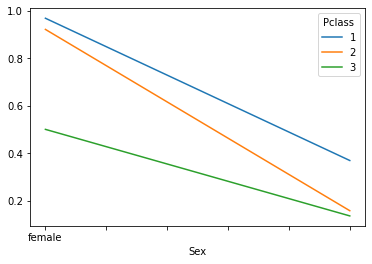

In [14]:
dataset.pivot_table('Survived', index='Sex', columns='Pclass').plot()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

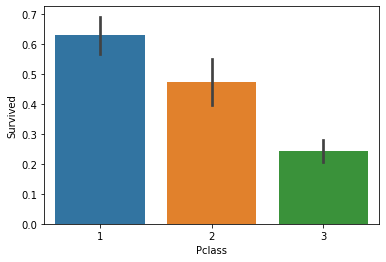

In [15]:
#survival rate of each class
sns.barplot(x='Pclass', y='Survived', data= dataset)

In [16]:
dataset

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
5,0,3,male,0,0,8.4583,Q
6,0,1,male,0,0,51.8625,S
7,0,3,male,3,1,21.0750,S
8,1,3,female,0,2,11.1333,S
9,1,2,female,1,0,30.0708,C


In [17]:
dataset.nunique()

Survived      2
Pclass        3
Sex           2
SibSp         7
Parch         7
Fare        248
Embarked      4
dtype: int64

In [18]:
dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

C:\Users\Aakash.kumar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

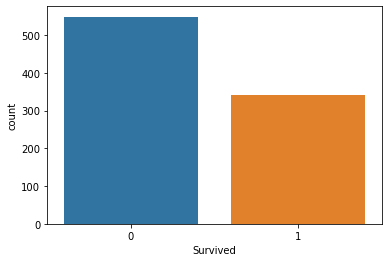

In [19]:
sns.countplot(dataset['Survived'])

In [20]:
dataset.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [21]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#encode sex column
dataset.iloc[:, 2] = labelencoder.fit_transform(dataset.iloc[:, 2].values)

#encode embarked column
dataset.iloc[:, 6] = labelencoder.fit_transform(dataset.iloc[:, 6].values)

In [23]:
dataset['Sex'].unique()
dataset['Embarked'].unique()

array([2, 0, 1, 3])

In [24]:
dataset.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,2
1,1,1,0,1,0,71.2833,0
2,1,3,0,0,0,7.9250,2
3,1,1,0,1,0,53.1000,2
4,0,3,1,0,0,8.0500,2


In [25]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
print(X)
print(y)

[[ 3.      1.      1.      0.      7.25    2.    ]
 [ 1.      0.      1.      0.     71.2833  0.    ]
 [ 3.      0.      0.      0.      7.925   2.    ]
 ...
 [ 3.      0.      1.      2.     23.45    2.    ]
 [ 1.      1.      0.      0.     30.      0.    ]
 [ 3.      1.      0.      0.      7.75    1.    ]]
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
# def models(X_train,y_train):
  
#   #Using Logistic Regression Algorithm to the Training Set
#   from sklearn.linear_model import LogisticRegression
#   log = LogisticRegression(random_state = 0)
#   log.fit(X_train, y_train)
  
#   #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
#   from sklearn.neighbors import KNeighborsClassifier
#   knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
#   knn.fit(X_train, y_train)

#   #Using SVC method of svm class to use Support Vector Machine Algorithm
#   from sklearn.svm import SVC
#   svc_lin = SVC(kernel = 'linear', random_state = 0)
#   svc_lin.fit(X_train, y_train)

#   #Using SVC method of svm class to use Kernel SVM Algorithm
#   from sklearn.svm import SVC
#   svc_rbf = SVC(kernel = 'rbf', random_state = 0)
#   svc_rbf.fit(X_train, y_train)

#   #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
#   from sklearn.naive_bayes import GaussianNB
#   gauss = GaussianNB()
#   gauss.fit(X_train, y_train)

#   #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
#   from sklearn.tree import DecisionTreeClassifier
#   tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
#   tree.fit(X_train, y_train)

#   #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
#   from sklearn.ensemble import RandomForestClassifier
#   forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
#   forest.fit(X_train, y_train)
  
#   #print model accuracy on the training data.
#   print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
#   print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))
#   print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
#   print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))
#   print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, y_train))
#   print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
#   print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))

#   return log, knn, svc_lin, svc_rbf, gauss, tree, forest

# model = models(X_train,y_train)

In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_jobs = -1,n_estimators = 15, criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15, n_jobs=-1, random_state=0)

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# tree.fit(X_train, y_train)

In [ ]:
#y_pred = classifier.predict(X_test)
#y_pred = tree.predict(X_test)

In [32]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 50)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 77.25 %
Standard Deviation: 10.88 %


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [10,30,50,100,200],'criterion' : ['entropy', 'gini'],
              'max_depth':[1,2,5,10,20], 'min_samples_leaf':[5,10,20,50,100], 'max_features':[2,3,4]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

In [115]:
from sklearn.model_selection import cross_val_score

mse=cross_val_score(tree,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-0.20980478312723622


In [116]:

from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

ridge=RidgeClassifier()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=RidgeClassifier(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [117]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 5}
-0.20989266210532925


In [32]:
#y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[96 14]
 [16 53]]


0.8324022346368715

In [ ]:
dataset_2 = pd.read_csv('test.csv')
data = dataset_2.copy()

In [ ]:
dataset_2.shape

In [ ]:
dataset_2 = dataset_2.drop(['PassengerId', 'Name','Age'], axis =1)
dataset_2[['Cabin','Embarked']] = dataset_2[['Cabin','Embarked']].fillna(value = 'other')
dataset_2['Fare'] = dataset_2['Fare'].fillna(value = '0')
dataset_2

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_2 = LabelEncoder()

# encode sex column
dataset_2.iloc[:, 1] = labelencoder_2.fit_transform(dataset_2.iloc[:, 1].values)

# encode embarked column
dataset_2.iloc[:, 7] = labelencoder_2.fit_transform(dataset_2.iloc[:, 7].values)
dataset_2 = dataset_2.drop(['Ticket', 'Cabin'], axis =1)
dataset_2

In [ ]:
dataset_2.isnull().sum()

In [ ]:
X_2 = dataset_2.iloc[:, :].values
X_2 = sc.transform(X_2)

In [ ]:
y_2 = tree.predict(X_2)
y_2

In [ ]:
print(dataset.columns)
print(dataset_2.columns)

In [ ]:
passengers = np.array(data['PassengerId'])
y2 = np.array(y_2)
#passengers

In [ ]:
print(type(y2), len(y2))
print(type(passengers), len(passengers))

In [ ]:
print(len(dataset_2))
print(len(X_2))
print(len(y_2))
print(len(passengers))
print(len(y2))

In [ ]:
abc = np.concatenate((passengers.reshape(len(passengers),1), y2.reshape(len(y2),1)),1)

In [ ]:
output = pd.DataFrame(abc, columns =['PassengerId', 'Survived'])

In [ ]:
#output.to_csv(path_or_buf= ('C:\\Users\\Aakash.kumar\\Desktop\\titanic_kaggle\\output2.csv'), sep=',', index= False)